In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [5]:
data_df = pd.read_csv('../Data/indexProcessed.csv')
data_df.head(5)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [6]:
data_df['Date'] =  pd.to_datetime(data_df['Date'])

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      104224 non-null  object        
 1   Date       104224 non-null  datetime64[ns]
 2   Open       104224 non-null  float64       
 3   High       104224 non-null  float64       
 4   Low        104224 non-null  float64       
 5   Close      104224 non-null  float64       
 6   Adj Close  104224 non-null  float64       
 7   Volume     104224 non-null  float64       
 8   CloseUSD   104224 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 7.2+ MB


In [9]:
ref_df = pd.read_csv('../Data/indexInfo.csv')
ref_df.head(5)

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [10]:
Merged_df = pd.merge(ref_df,data_df, how='inner')
Merged_df.head(5)

,Region,Exchange,Index,Currency,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,United States,New York Stock Exchange,NYA,USD,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
1,United States,New York Stock Exchange,NYA,USD,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
2,United States,New York Stock Exchange,NYA,USD,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
3,United States,New York Stock Exchange,NYA,USD,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
4,United States,New York Stock Exchange,NYA,USD,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


In [11]:
# NYA DF
df_NYA = Merged_df[Merged_df['Index'] == 'NYA']
df_NYA['Delta'] = df_NYA['Close'].diff(periods=1)
df_NYA['Target'] = np.where(df_NYA['Delta']>=0, 'Up', 'Down')
df_NYA = df_NYA.dropna(how="any")
df_NYA.head(5)

/Users/michalmichael/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/michalmichael/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Region,Exchange,Index,Currency,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Delta,Target
1,United States,New York Stock Exchange,NYA,USD,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,-1.479980,Down
2,United States,New York Stock Exchange,NYA,USD,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,0.630005,Up
3,United States,New York Stock Exchange,NYA,USD,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,3.279968,Up
4,United States,New York Stock Exchange,NYA,USD,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,0.950012,Up
5,United States,New York Stock Exchange,NYA,USD,1966-01-07,532.599976,532.599976,532.599976,532.599976,532.599976,0.0,532.599976,0.529969,Up


In [12]:
df_NYA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13946 entries, 1 to 13946
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Region     13946 non-null  object        
 1   Exchange   13946 non-null  object        
 2   Index      13946 non-null  object        
 3   Currency   13946 non-null  object        
 4   Date       13946 non-null  datetime64[ns]
 5   Open       13946 non-null  float64       
 6   High       13946 non-null  float64       
 7   Low        13946 non-null  float64       
 8   Close      13946 non-null  float64       
 9   Adj Close  13946 non-null  float64       
 10  Volume     13946 non-null  float64       
 11  CloseUSD   13946 non-null  float64       
 12  Delta      13946 non-null  float64       
 13  Target     13946 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 1.6+ MB


In [13]:
# NASDAQ DF
df_NASDAQ = Merged_df[Merged_df['Index'] == 'IXIC']
df_NASDAQ['Delta'] = df_NASDAQ['Close'].diff(periods=1)
df_NASDAQ['Target'] = np.where(df_NASDAQ['Delta']>=0, 'Up', 'Down')
df_NASDAQ = df_NASDAQ.dropna(how="any")
df_NASDAQ.head(5)

/Users/michalmichael/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/michalmichael/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Region,Exchange,Index,Currency,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Delta,Target
13948,United States,NASDAQ,IXIC,USD,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.0,100.839996,0.839996,Up
13949,United States,NASDAQ,IXIC,USD,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.0,100.760002,-0.079994,Down
13950,United States,NASDAQ,IXIC,USD,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.0,100.690002,-0.070000,Down
13951,United States,NASDAQ,IXIC,USD,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.0,101.449997,0.759995,Up
13952,United States,NASDAQ,IXIC,USD,1971-02-12,102.050003,102.050003,102.050003,102.050003,102.050003,0.0,102.050003,0.600006,Up


In [14]:
df_NASDAQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12689 entries, 13948 to 26636
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Region     12689 non-null  object        
 1   Exchange   12689 non-null  object        
 2   Index      12689 non-null  object        
 3   Currency   12689 non-null  object        
 4   Date       12689 non-null  datetime64[ns]
 5   Open       12689 non-null  float64       
 6   High       12689 non-null  float64       
 7   Low        12689 non-null  float64       
 8   Close      12689 non-null  float64       
 9   Adj Close  12689 non-null  float64       
 10  Volume     12689 non-null  float64       
 11  CloseUSD   12689 non-null  float64       
 12  Delta      12689 non-null  float64       
 13  Target     12689 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 1.5+ MB


In [15]:
# NYA and NASDAQ DF
NYA_NASDAQ = [df_NYA, df_NASDAQ]
df_NYA_NASDAQ = pd.concat(NYA_NASDAQ)
df_NYA_NASDAQ.head()

,Region,Exchange,Index,Currency,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Delta,Target
1,United States,New York Stock Exchange,NYA,USD,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,-1.479980,Down
2,United States,New York Stock Exchange,NYA,USD,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,0.630005,Up
3,United States,New York Stock Exchange,NYA,USD,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,3.279968,Up
4,United States,New York Stock Exchange,NYA,USD,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,0.950012,Up
5,United States,New York Stock Exchange,NYA,USD,1966-01-07,532.599976,532.599976,532.599976,532.599976,532.599976,0.0,532.599976,0.529969,Up


In [16]:
df_NYA_NASDAQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26635 entries, 1 to 26636
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Region     26635 non-null  object        
 1   Exchange   26635 non-null  object        
 2   Index      26635 non-null  object        
 3   Currency   26635 non-null  object        
 4   Date       26635 non-null  datetime64[ns]
 5   Open       26635 non-null  float64       
 6   High       26635 non-null  float64       
 7   Low        26635 non-null  float64       
 8   Close      26635 non-null  float64       
 9   Adj Close  26635 non-null  float64       
 10  Volume     26635 non-null  float64       
 11  CloseUSD   26635 non-null  float64       
 12  Delta      26635 non-null  float64       
 13  Target     26635 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 3.0+ MB


### Basic Plots

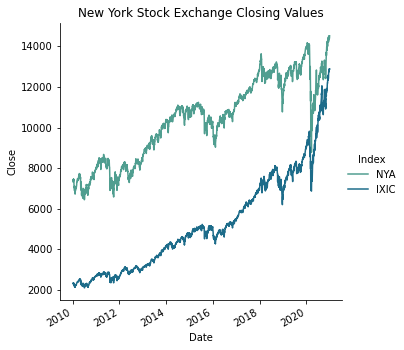

In [17]:
## line chart of closing 

## narrow dates to last 10 years
dates= (df_NYA_NASDAQ['Date'] > '2010-01-01') & (df_NYA_NASDAQ['Date'] < '2021-01-01')
small_df = df_NYA_NASDAQ.loc[dates]

## plot
palette = sns.color_palette("crest", 2)
close_plt = sns.relplot(x="Date", y="Close", hue = "Index", palette=palette, kind="line", data= small_df)
close_plt.set(title = 'New York Stock Exchange Closing Values')
close_plt.figure.autofmt_xdate()

In [ ]:
close_plt.savefig('Plots/NYA_NASDAQ_Close_linegraph.png')

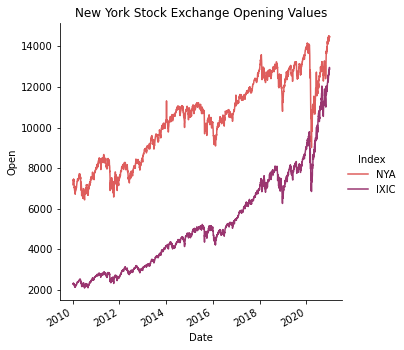

In [18]:
## Line chart of opening
## plot
palette = sns.color_palette("flare", 2)
open_plt = sns.relplot(x="Date", y="Open", hue = "Index", palette=palette, kind="line", data= small_df)
open_plt.set(title = 'New York Stock Exchange Opening Values')
open_plt.figure.autofmt_xdate()

In [ ]:
open_plt.savefig('Plots/NYA_NASDAQ_Open_linegraph.png')

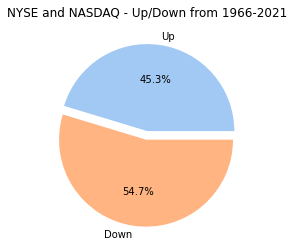

In [32]:
# overall basic pie chart of yes/no over the years
total_days = df_NYA_NASDAQ.groupby(["Target"]).count()["Date"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(total_days,
       labels=["Up", "Down"],
       colors=colors,
       autopct='%.1f%%',
       explode=[0, 0.1]
       )
plt.title("NYSE and NASDAQ - Up/Down from 1966-2021")

plt.savefig('../Plots/Exploratory_charts/NYA_NASDAQ_Up_Down_Pie_Chart.png')

plt.show()

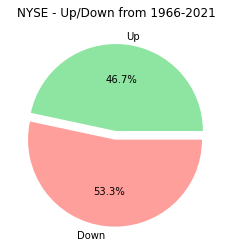

In [34]:
# NYSE basic pie chart of yes/no over the years
total_days = df_NYA.groupby(["Target"]).count()["Date"]
colors = sns.color_palette('pastel')[2:4]
plt.pie(total_days,
       labels=["Up", "Down"],
       colors=colors,
       autopct='%.1f%%',
       explode=[0, 0.1]
       )
plt.title("NYSE - Up/Down from 1966-2021")

plt.savefig('../Plots/Exploratory_charts/NYA_Up_Down_Pie_Chart.png')

plt.show()

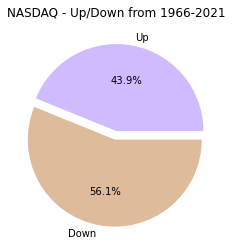

In [35]:
# NASDAQ basic pie chart of yes/no over the years
total_days = df_NASDAQ.groupby(["Target"]).count()["Date"]
colors = sns.color_palette('pastel')[4:6]
plt.pie(total_days,
       labels=["Up", "Down"],
       colors=colors,
       autopct='%.1f%%',
       explode=[0, 0.1]
       )
plt.title("NASDAQ - Up/Down from 1966-2021")

plt.savefig('../Plots/Exploratory_charts/NASDAQ_Up_Down_Pie_Chart.png')

plt.show()